In [2]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Filter data

In [3]:
data = pd.read_csv('./data/car.data')

# features needed: buying, maint, safety
X = data[['buying','maint','safety']].values
# class is the label
y = data[['class']]

## Convert features string to semantic numbers

In [4]:
def transform_features(features):
    feature_map = {
        'vhigh': 3, 
        'low': 0, 
        'med': 1, 
        'high': 2
    }

    processed_X = []

    for row in features:
        new_row = []
        for f in row:
            new_row.append(feature_map.get(f))
        processed_X.append(new_row)

    return np.array(processed_X)

X = transform_features(X)
X


array([[3, 3, 0],
       [3, 3, 1],
       [3, 3, 2],
       ...,
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 2]])

### Data Visualization

In [34]:
X

array([[3, 3, 0],
       [3, 3, 1],
       [3, 3, 2],
       ...,
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 2]])

## Converting y=label to numbers

In [5]:
# mapping for conversion
label_mapping = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}
new_y = y['class'].map(label_mapping)
y = np.array(new_y)

In [6]:
y.shape

(1728,)

## Split data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Choosing the best K value

19

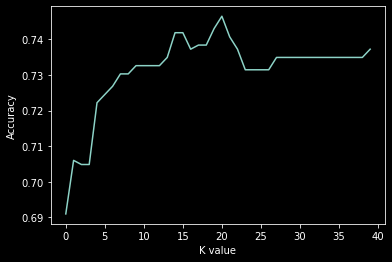

In [9]:
accuracy_rate = []
for i in range(40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction)
    accuracy_rate.append(accuracy)

import matplotlib.pyplot as plt
plt.plot(accuracy_rate)
plt.xlabel('K value')
plt.ylabel('Accuracy')

max = 0.01
k = 1
for i in range(len(accuracy_rate)):
    if accuracy_rate[i] > max: 
        max = accuracy_rate[i]
        k = i

# getting the right K value
k = k - 1 if k % 2 == 0 else k
k

## Creating the model

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

## Testing

In [11]:
prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)

print('Accuracy:', accuracy)

Accuracy: 0.7384259259259259


## API

In [15]:
def classify(X_input, format = True):
    transformed_input = transform_features([X_input])
    result = knn.predict(transformed_input)[0]

    label_map = {
        0: 'unacc',
        1: 'acc',
        2: 'good',
        3: 'vgood'
    }
    return label_map[result] if format else result

print(data[['buying','maint','safety', 'class']])
classify(['low', 'low','high'])

     buying  maint safety  class
0     vhigh  vhigh    low  unacc
1     vhigh  vhigh    med  unacc
2     vhigh  vhigh   high  unacc
3     vhigh  vhigh    low  unacc
4     vhigh  vhigh    med  unacc
...     ...    ...    ...    ...
1723    low    low    med   good
1724    low    low   high  vgood
1725    low    low    low  unacc
1726    low    low    med   good
1727    low    low   high  vgood

[1728 rows x 4 columns]


'unacc'